In [5]:
# Import the pandas library for data manipulation and analysis
import pandas as pd
# Configure pandas to display all columns of a DataFrame when printing
pd.set_option("display.max_columns", None)
# Import the NumPy library for numerical computations
import numpy as np
# Import the matplotlib library for data visualization
import matplotlib.pyplot as plt
# (Optional) This line is commented out; when using Jupyter Notebook, 
# uncomment it to display plots directly below the code cells
# %matplotlib inline
# Import train_test_split to divide the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Import MinMaxScaler to scale features to a specific range (typically 0 to 1)
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Import the PyTorch library for building and training neural networks
import torch
# Import the nn module from PyTorch which contains classes for building neural network layers
import torch.nn as nn
# Import TensorDataset and DataLoader for handling and batching datasets
from torch.utils.data import TensorDataset, DataLoader
# Read a CSV file containing the dataset into a pandas DataFrame
# Make sure the path is correct and accessible from your system
dataframe = pd.read_csv(r"E:\Study\ai security issues\section5\dataset_phishing.csv")
# Print the shape of the DataFrame (number of rows and columns)
# You can uncomment this to check dataset dimensions
print(dataframe.shape)


(11430, 89)


In [7]:
# Display the first 10 rows of the DataFrame to inspect the dataset
print(dataframe.head(10))
# Remove the 'url' column from the DataFrame
# Note: inplace=True modifies the original DataFrame and returns None, so don't assign it back to a variable
dataframe.drop(["url"], axis=1, inplace=True)
# Display the first 5 rows of the DataFrame after dropping the 'url' column
print(dataframe.head())


                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   
5                   http://appleid.apple.com-app.es/          32   
6                                http://www.mutuo.it          19   
7  http://www.shadetreetechnology.com/V4/validati...          81   
8         http://vamoaestudiarmedicina.blogspot.com/          42   
9  https://parade.com/425836/joshwigler/the-amazi...         104   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0               19   0        3           0      0      0       0      0   
1               23   1        1           0      0      0       0      0   
2               50   1 

In [8]:
# Identify all columns in the DataFrame that have the data type 'object' (typically strings or categorical data)
object_features = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
# Print the list of object-type columns to see which features might need encoding
print(object_features)
# Display the count of each unique value in the 'status' column
# This is useful for understanding class distribution (e.g., phishing vs. legitimate)
print(dataframe['status'].value_counts())

['status']
status
legitimate    5715
phishing      5715
Name: count, dtype: int64


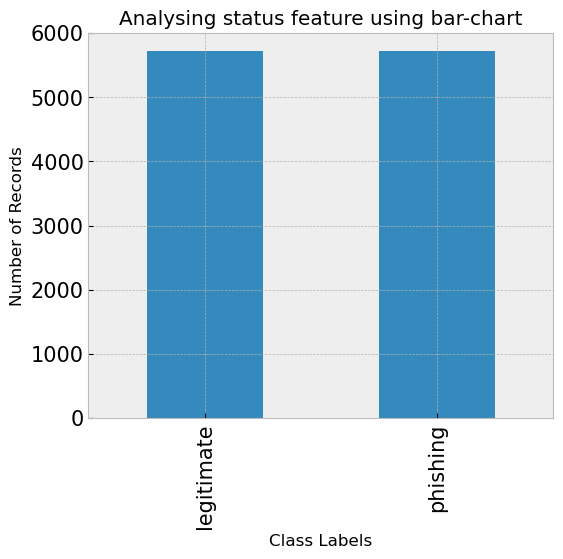

In [9]:
# Use the 'bmh' plotting style for a cleaner visualization
with plt.style.context(style="bmh"):
# Create a bar plot of the value counts for the 'status' column
    fig = dataframe['status'].value_counts().plot.bar(
        figsize=(6, 5),               # Set the figure size
        fontsize=15,                  # Set font size for tick labels
        title='Analysing status feature using bar-chart',  # Title of the chart
    )
# Set x-axis and y-axis labels
    fig.set_xlabel("Class Labels", fontsize=12)
    fig.set_ylabel("Number of Records", fontsize=12)
# Show the plot
plt.show()


In [10]:
# Get the unique class labels from the 'status' column as a list
class_labels = dataframe['status'].unique().tolist()
# Sort the class labels alphabetically or lexicographically
class_labels.sort()
# Print the sorted class labels
print(class_labels)
# Create a dictionary to map each label to a unique integer
class_dict = {}
for idx, label in enumerate(class_labels):
    class_dict[label] = idx
# Optional: Print the dictionary to verify label-to-index mapping
print(class_dict)

['legitimate', 'phishing']
{'legitimate': 0, 'phishing': 1}


In [11]:
# Replace the 'status' column string values with their corresponding integer values using class_dict
dataframe['status'] = dataframe['status'].map(class_dict)
# Display the first 5 rows of the updated DataFrame to confirm encoding
print(dataframe.head())

   length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          37               19   0        3           0      0      0       0   
1          77               23   1        1           0      0      0       0   
2         126               50   1        4           1      0      1       2   
3          18               11   0        2           0      0      0       0   
4          55               15   0        2           2      0      0       0   

   nb_or  nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash  nb_star  \
0      0      0              0         0           0         3        0   
1      0      0              0         0           0         5        0   
2      0      3              2         0           0         5        0   
3      0      0              0         0           0         2        0   
4      0      0              0         0           0         5        0   

   nb_colon  nb_comma  nb_semicolumn  nb_dollar  nb_space  nb_

In [12]:
# Select all columns except the last one as features (X)
X = dataframe.iloc[:, :-1]
# Select only the last column as the target variable (y), returned as a DataFrame
y = dataframe.iloc[:, -1:]
# Display the first 5 rows of the feature set
print("X head:\n", X.head())
# Display the first 5 rows of the target variable
print("y head:\n", y.head())

X head:
    length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          37               19   0        3           0      0      0       0   
1          77               23   1        1           0      0      0       0   
2         126               50   1        4           1      0      1       2   
3          18               11   0        2           0      0      0       0   
4          55               15   0        2           2      0      0       0   

   nb_or  nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash  nb_star  \
0      0      0              0         0           0         3        0   
1      0      0              0         0           0         5        0   
2      0      3              2         0           0         5        0   
3      0      0              0         0           0         2        0   
4      0      0              0         0           0         5        0   

   nb_colon  nb_comma  nb_semicolumn  nb_dollar  nb_s

In [13]:
# Initialize the MinMaxScaler to normalize the data within a range of [0, 1]
scaler = MinMaxScaler()
# Fit the scaler to the data (X) to learn the minimum and maximum values of each feature
scaler.fit(X.values)
# Apply the transformation to scale the original data (X) to the [0, 1] range based on the learned min and max values
X_scaled = scaler.transform(X.values)
# Convert the scaled data (X_scaled) into a new DataFrame called 'new_X'
# The columns of 'new_X' will be the same as those in the original DataFrame (X)
new_X = pd.DataFrame(data=X_scaled, columns=X.columns)
# Optionally, print the first few rows of the new DataFrame (uncomment the line below to view)
print(new_X.head())

   length_url  length_hostname   ip   nb_dots  nb_hyphens  nb_at     nb_qm  \
0    0.015347         0.071429  0.0  0.086957    0.000000    0.0  0.000000   
1    0.039902         0.090476  1.0  0.000000    0.000000    0.0  0.000000   
2    0.069982         0.219048  1.0  0.130435    0.023256    0.0  0.333333   
3    0.003683         0.033333  0.0  0.043478    0.000000    0.0  0.000000   
4    0.026397         0.052381  0.0  0.043478    0.046512    0.0  0.000000   

     nb_and  nb_or     nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash  \
0  0.000000    0.0  0.000000       0.000000       0.0         0.0  0.032258   
1  0.000000    0.0  0.000000       0.000000       0.0         0.0  0.096774   
2  0.105263    0.0  0.157895       0.111111       0.0         0.0  0.096774   
3  0.000000    0.0  0.000000       0.000000       0.0         0.0  0.000000   
4  0.000000    0.0  0.000000       0.000000       0.0         0.0  0.096774   

   nb_star  nb_colon  nb_comma  nb_semicolumn  nb_dollar

In [14]:
# Split the normalized dataset (new_X) and target labels (y) into training and testing sets
# test_size=0.2 means 20% of the data is used for testing, 80% for training
# random_state=1 ensures reproducibility of the split
# shuffle=True ensures the data is shuffled before splitting
# stratify=y ensures the split maintains the proportion of target classes in both sets 
# random_state=1 ensures that every time you run the code, the split between training and test sets is exactly the same.
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)
# Print the shapes of the training and testing sets for both features and labels
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Display the first few rows of the training and testing feature sets and label sets
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())
# Convert the training features DataFrame to a PyTorch tensor of type float
train_input_tensor = torch.from_numpy(X_train.values).float()
# Convert the 'status' column of the training labels to a PyTorch tensor of type float
train_label_tensor = torch.from_numpy(y_train['status'].values).float()
# Convert the testing features DataFrame to a PyTorch tensor of type float
val_input_tensor = torch.from_numpy(X_test.values).float()
# Convert the 'status' column of the testing labels to a PyTorch tensor of type float
val_label_tensor = torch.from_numpy(y_test['status'].values).float()
# Print the training input tensor to verify its contents
print(train_input_tensor)

(9144, 87) (9144, 1) (2286, 87) (2286, 1)
      length_url  length_hostname   ip   nb_dots  nb_hyphens  nb_at     nb_qm  \
996     0.038060         0.042857  0.0  0.000000    0.139535    0.0  0.000000   
5909    0.214242         0.076190  0.0  0.086957    0.000000    0.0  0.333333   
4141    0.010436         0.080952  0.0  0.043478    0.000000    0.0  0.000000   
2366    0.034991         0.271429  0.0  0.260870    0.000000    0.0  0.000000   
79      0.014733         0.119048  0.0  0.043478    0.000000    0.0  0.000000   

        nb_and  nb_or     nb_eq  nb_underscore  nb_tilde  nb_percent  \
996   0.000000    0.0  0.000000            0.0       0.0         0.0   
5909  0.052632    0.0  0.105263            0.0       0.0         0.0   
4141  0.000000    0.0  0.000000            0.0       0.0         0.0   
2366  0.000000    0.0  0.000000            0.0       0.0         0.0   
79    0.000000    0.0  0.000000            0.0       0.0         0.0   

      nb_slash  nb_star  nb_colon  nb_

In [15]:
# Add an extra dimension to the train_label_tensor to convert it into a 2D tensor with shape [N, 1]
# This is necessary for many machine learning frameworks that expect labels to have an additional dimension.
train_label_tensor2 = train_label_tensor.unsqueeze(1)  
print(train_label_tensor2)  # Print the modified train label tensor to verify its shape
# Similarly, add an extra dimension to the validation label tensor to make it a 2D tensor [N, 1]
val_label_tensor2 = val_label_tensor.unsqueeze(1)  
print(val_label_tensor2)  # Print the modified validation label tensor to verify its shape
# Create a TensorDataset object for the training data.
# A TensorDataset combines the input data (train_input_tensor) and the corresponding labels (train_label_tensor2) into a single dataset.
train_dataset = TensorDataset(train_input_tensor, train_label_tensor2)
# Create a TensorDataset object for the validation data.
# The validation dataset combines the validation inputs (val_input_tensor) and corresponding labels (val_label_tensor2).
val_dataset = TensorDataset(val_input_tensor, val_label_tensor2)


tensor([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [1.]])
tensor([[1.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [1.]])


In [16]:
# Create a DataLoader for the training dataset
# It splits the dataset into batches of size 32 and shuffles the data for randomness
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
# Create a DataLoader for the validation dataset
# It also splits the dataset into batches of size 32 and shuffles the data
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=True)
# Print the number of batches in the train_loader
# This is the number of times the training data will be divided into batches
print(f"number of batches in train_loader: {len(train_loader)}")
# Print the total number of records (samples) in the training dataset
# This is the total number of examples in the training data
print(f"number of records in train_loader: {len(train_loader.dataset)}")
# Print the number of batches in the val_loader
# This is the number of times the validation data will be divided into batches
print(f"number of batches in val_loader: {len(val_loader)}")
# Print the total number of records (samples) in the validation dataset
# This is the total number of examples in the validation data
print(f"number of records in val_loader: {len(val_loader.dataset)}")


number of batches in train_loader: 286
number of records in train_loader: 9144
number of batches in val_loader: 72
number of records in val_loader: 2286


In [17]:
# Set the device to GPU (cuda) if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(87, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

model = LogisticRegressionModel()
print(model)


LogisticRegressionModel(
  (linear): Linear(in_features=87, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
# Define the optimizer using Adam algorithm with learning rate 0.001
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Define the loss function as Binary Cross Entropy Loss (used for binary classification)
criterion = nn.BCELoss()

# Define the training loop function
def train_loop(model, train_loader, val_loader, device, optimizer, criterion, batch_size, epochs):
    # Move the model to the specified device (GPU or CPU)
    model = model.to(device)

    # Get the number of batches in training and validation loaders
    train_batch_size = len(train_loader)
    val_batch_size = len(val_loader)

    # Dictionary to store history of accuracy and loss for each epoch
    history = {"train_accuracy": [], "train_loss": [], "val_accuracy": [], "val_loss": []}

    # Loop over each epoch
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        train_accuracy = 0
        train_loss = 0
        val_accuracy = 0
        val_loss = 0

        # Loop through each batch of training data
        for X, y in train_loader:
            # Move data to the selected device
            X = X.to(device)
            y = y.to(device)

            # Forward pass: compute model predictions
            outputs = model(X)
            pred = torch.round(outputs)  # Round output to get binary predictions

            # Compute loss
            loss = criterion(outputs, y)

            # Backward pass: compute gradients
            optimizer.zero_grad()  # Clear old gradients
            loss.backward()        # Backpropagation
            optimizer.step()       # Update model weights

            # Calculate current batch loss and accuracy
            cur_train_loss = loss.item()
            cur_train_accuracy = (pred == y).sum().item() / batch_size

            # Accumulate total loss and accuracy
            train_accuracy += cur_train_accuracy
            train_loss += cur_train_loss

        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation for validation
            for X, y in val_loader:
                X = X.to(device)
                y = y.to(device)

                outputs = model(X)
                pred = torch.round(outputs)

                loss = criterion(outputs, y)

                cur_val_loss = loss.item()
                cur_val_accuracy = (pred == y).sum().item() / batch_size

                val_accuracy += cur_val_accuracy
                val_loss += cur_val_loss

        # Average accuracy and loss over all batches
        train_accuracy = train_accuracy / train_batch_size
        train_loss = train_loss / train_batch_size
        val_accuracy = val_accuracy / val_batch_size
        val_loss = val_loss / val_batch_size

        # Print metrics for the current epoch
        print(f"[{epoch+1:>3d}/{epochs:>3d}], train_accuracy:{train_accuracy:>5f}, train_loss:{train_loss:>5f}, val_accuracy:{val_accuracy:>5f}, val_loss:{val_loss:>5f}")

        # Save metrics to history dictionary
        history['train_accuracy'].append(train_accuracy)
        history['train_loss'].append(train_loss)
        history['val_accuracy'].append(val_accuracy)
        history['val_loss'].append(val_loss)

    # Save the trained model weights to the specified file path
    PATH = r"E:\Study\ai security issues\section5\dataset_phishing.csv"
    # write your own path
    torch.save(model.state_dict(), PATH)

    # Return the history dictionary containing accuracy and loss for each epoch
    return history

# Call the training loop function and store the results in the 'history' dictionary
history = train_loop(model, train_loader, val_loader, device, optimizer, criterion, batch_size=32, epochs=80)


[  1/ 80], train_accuracy:0.782452, train_loss:0.602025, val_accuracy:0.848524, val_loss:0.528207
[  2/ 80], train_accuracy:0.865057, train_loss:0.477126, val_accuracy:0.869358, val_loss:0.440221
[  3/ 80], train_accuracy:0.883632, train_loss:0.406714, val_accuracy:0.881076, val_loss:0.385239
[  4/ 80], train_accuracy:0.894340, train_loss:0.360899, val_accuracy:0.888455, val_loss:0.349636
[  5/ 80], train_accuracy:0.901989, train_loss:0.328317, val_accuracy:0.894965, val_loss:0.321484
[  6/ 80], train_accuracy:0.905922, train_loss:0.303889, val_accuracy:0.901910, val_loss:0.301710
[  7/ 80], train_accuracy:0.910074, train_loss:0.284658, val_accuracy:0.906250, val_loss:0.283736
[  8/ 80], train_accuracy:0.913462, train_loss:0.269132, val_accuracy:0.907552, val_loss:0.270830
[  9/ 80], train_accuracy:0.916084, train_loss:0.256593, val_accuracy:0.906250, val_loss:0.258949
[ 10/ 80], train_accuracy:0.917832, train_loss:0.246183, val_accuracy:0.908854, val_loss:0.249411
[ 11/ 80], train_acc

In [ ]:
class MITREAttackFramework:
    """
    Comprehensive MITRE ATT&CK mapping for phishing detection
    """

    # Dictionary of phishing-related techniques and their subtechniques
    TECHNIQUES = {
        'T1566': {  # Main technique: Phishing
            'name': 'Phishing',
            'description': 'Adversary sends fraudulent messages to trick victims',
            'subtechniques': {
                'T1566.001': {
                    'name': 'Spearphishing Attachment',
                    'indicators': ['having_IP_Address', 'URL_of_Anchor'],  # Features from dataset
                    'mitigations': ['M1017', 'M1054']
                },
                'T1566.002': {
                    'name': 'Spearphishing Link',
                    'indicators': ['Shortining_Service', 'having_At_Symbol'],
                    'mitigations': ['M1021', 'M1017']
                },
                'T1566.003': {
                    'name': 'Spearphishing via Service',
                    'indicators': ['SFH', 'web_traffic'],
                    'mitigations': ['M1017', 'M1054']
                }
            }
        },
        'T1598': {  # Alternative technique: Info phishing without malware delivery
            'name': 'Phishing for Information',
            'description': 'Phishing to collect information rather than deliver payloads',
            'mitigations': ['M1017', 'M1021']
            # Could be expanded with indicators if needed
        }
    }

    # Mapping of mitigation IDs to their descriptions
    MITIGATIONS = {
        'M1017': 'User Training',
        'M1021': 'Restrict Web-Based Content',
        'M1054': 'Software Configuration'
    }

    @classmethod
    def analyze_sample(cls, features):
        """
        Analyze sample feature values to determine potential MITRE techniques.
        :param features: dictionary of feature_name -> float values (e.g., 0.0 to 1.0)
        :return: a sorted list of detected techniques/subtechniques with confidence scores
        """
        results = []  # This will store the output

        # Loop over all techniques in the framework
        for tech_id, tech_data in cls.TECHNIQUES.items():

            # Check if the technique has subtechniques (e.g., spearphishing types)
            if 'subtechniques' in tech_data:
                # Loop through each subtechnique
                for sub_id, sub_data in tech_data['subtechniques'].items():

                    # Calculate how many indicators for this subtechnique are activated
                    score = sum(
                        1 for indicator in sub_data['indicators']
                        if indicator in features and features[indicator] > 0.5
                    )

                    # If at least one indicator is active, consider it relevant
                    if score > 0:
                        confidence = score / len(sub_data['indicators'])  # Normalized confidence
                        results.append({
                            'technique_id': sub_id,
                            'technique_name': sub_data['name'],
                            'confidence': confidence,
                            'mitigations': sub_data['mitigations'],
                            'parent_technique': tech_id
                        })
            else:
                # Handle main-level techniques without subtechniques
                if 'indicators' in tech_data:
                    score = sum(
                        1 for indicator in tech_data['indicators']
                        if indicator in features and features[indicator] > 0.5
                    )
                    if score > 0:
                        confidence = score / len(tech_data['indicators'])
                        results.append({
                            'technique_id': tech_id,
                            'technique_name': tech_data['name'],
                            'confidence': confidence,
                            'mitigations': tech_data['mitigations']
                        })

        # Sort results from highest to lowest confidence
        return sorted(results, key=lambda x: x['confidence'], reverse=True)


In [26]:
# Load the trained phishing model weights from the saved file
df = pd.read_csv(r"C:\Users\Habiba Tarek\Downloads\Compressed\dataset_phishing.csv\dataset_phishing.csv")
# Set the model to evaluation mode (disables dropout, etc.)
model.eval()

# Simulate phishing mitigation on the test (validation) set
with torch.no_grad():  # Disable gradient calculation (saves memory and speeds up inference)
    for X, y in val_loader:
        # Move input data to the correct device (CPU or GPU)
        X = X.to(device)

        # Make predictions using the trained model
        predictions = model(X)

        # Apply threshold of 0.5 to convert probabilities to binary decisions
        decisions = (predictions > 0.5).float()

        # Loop through each prediction and its corresponding true label
        for i, (pred, actual) in enumerate(zip(decisions, y)):
            # Decide action based on the model prediction: Block or Allow the URL
            url_status = "Block" if pred.item() == 1 else "Allow"

            # Print predicted value, actual label, and action taken
            print(f"URL {i+1}: Predicted={pred.item()}, Actual={actual.item()}, Action={url_status}")

# Evaluate the accuracy of the mitigation decisions on the last batch
accuracy = (decisions == y.to(device)).sum().item() / len(y)
# Print the mitigation accuracy
print(f"Mitigation Accuracy: {accuracy:.5f}")

URL 1: Predicted=1.0, Actual=1.0, Action=Block
URL 2: Predicted=0.0, Actual=0.0, Action=Allow
URL 3: Predicted=0.0, Actual=0.0, Action=Allow
URL 4: Predicted=0.0, Actual=0.0, Action=Allow
URL 5: Predicted=0.0, Actual=0.0, Action=Allow
URL 6: Predicted=0.0, Actual=0.0, Action=Allow
URL 7: Predicted=1.0, Actual=1.0, Action=Block
URL 8: Predicted=1.0, Actual=1.0, Action=Block
URL 9: Predicted=1.0, Actual=1.0, Action=Block
URL 10: Predicted=1.0, Actual=0.0, Action=Block
URL 11: Predicted=0.0, Actual=0.0, Action=Allow
URL 12: Predicted=1.0, Actual=1.0, Action=Block
URL 13: Predicted=0.0, Actual=0.0, Action=Allow
URL 14: Predicted=1.0, Actual=1.0, Action=Block
URL 15: Predicted=1.0, Actual=1.0, Action=Block
URL 16: Predicted=0.0, Actual=0.0, Action=Allow
URL 17: Predicted=1.0, Actual=1.0, Action=Block
URL 18: Predicted=1.0, Actual=1.0, Action=Block
URL 19: Predicted=1.0, Actual=1.0, Action=Block
URL 20: Predicted=1.0, Actual=1.0, Action=Block
URL 21: Predicted=1.0, Actual=1.0, Action=Block
U